# Exemple Chollet 04

Source : F. Chollet, L’apprentissage profond avec Python. Saint-Cyr-sur-Loire: Machinelearning.fr, 2020. p???

In [4]:
import keras
keras.__version__

'2.14.0'

In [7]:
from keras.models import load_model
from keras import optimizers

In [5]:
model = load_model('./cats_and_dogs_small_2.keras', compile=False) #compile=False because optimizers.legacy.RMSprop issue
model.summary()  # As a reminder.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.legacy.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [9]:
import os

> Attention : utilisation d'un répertoire de données en dehors de l'environnement do notebook !

In [10]:
base_dir = '/Users/me/Temp/Data/cats_and_dogs_small'

In [13]:
img_path = os.path.join(base_dir, 'test/cats/cat.1700.jpg')
img_path

'/Users/me/Temp/Data/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [14]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


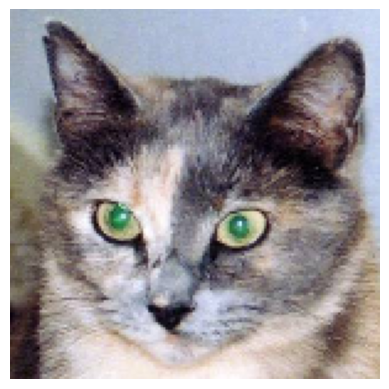

In [16]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.axis("off")
plt.show()

In [17]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [18]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 87ms/step


In [20]:
len(activations)

8

In [21]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [31]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 75.0

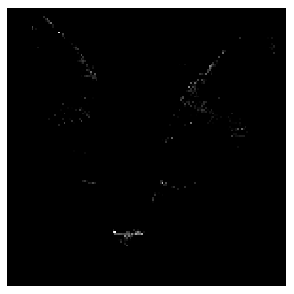

In [34]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='gray')
plt.axis("off")
plt.show()

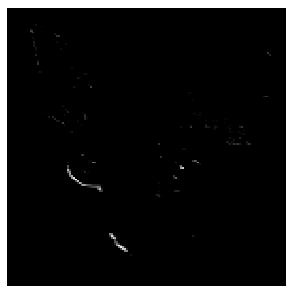

In [35]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='gray')
plt.axis("off")
plt.show()

/var/folders/q9/0mj9qf_1041gdlg86vv356hh0000gn/T/ipykernel_3232/2132610360.py:27: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


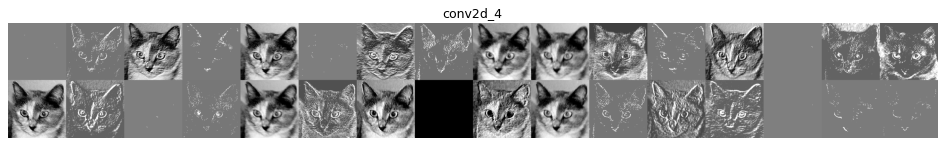

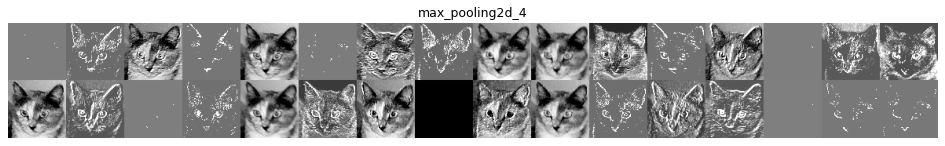

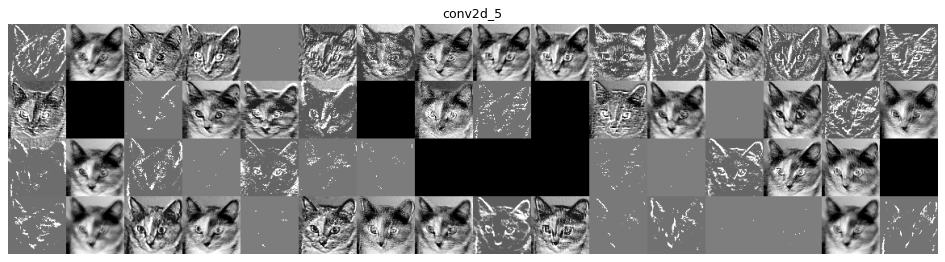

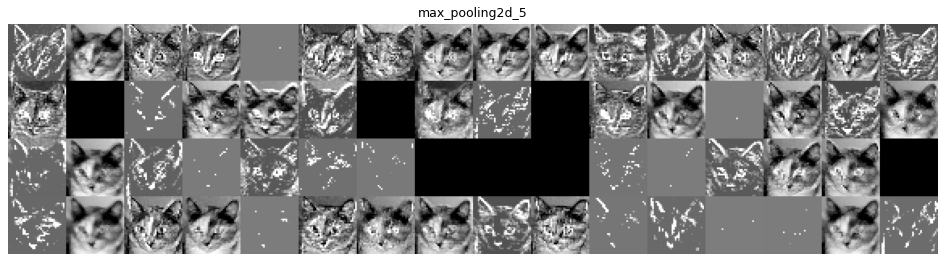

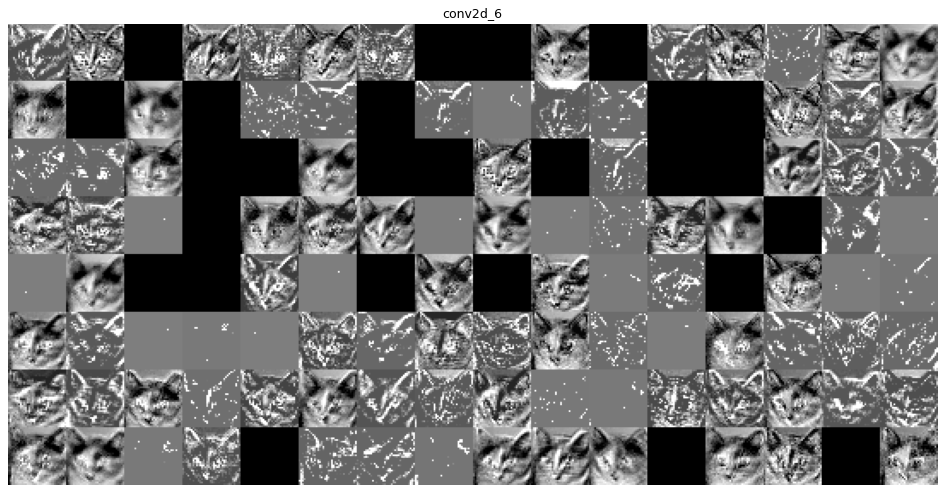

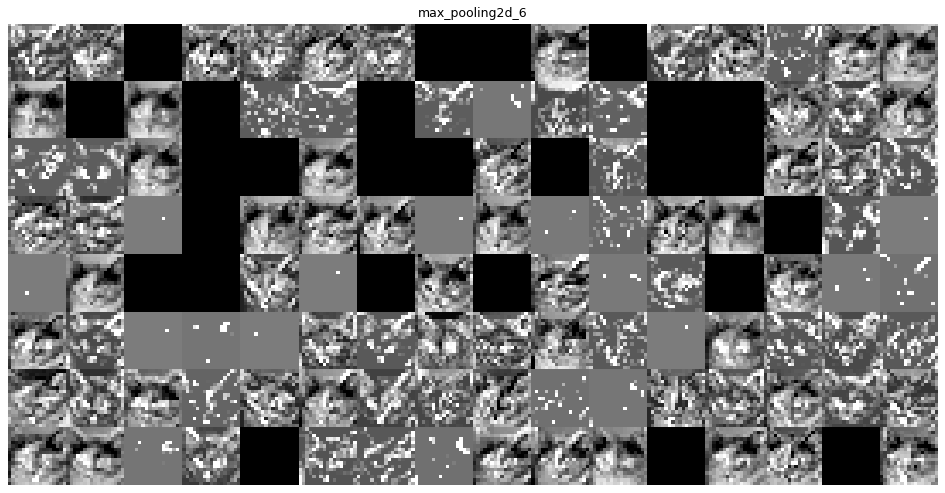

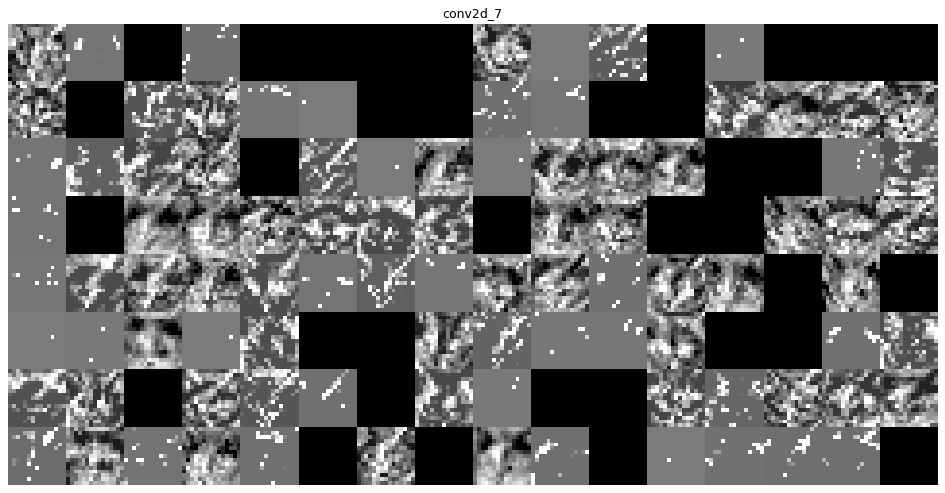

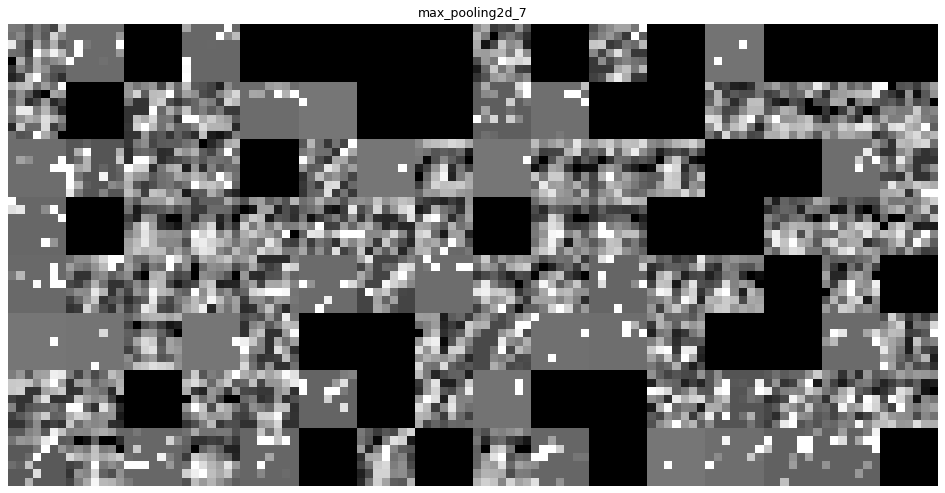

In [39]:
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[:8]]
images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # The feature map has shape (1, size, size, n_features)
    # This is the number of features in the feature map
    size = layer_activation.shape[1]
    n_features = layer_activation.shape[-1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(True)
    plt.axis("off")
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    
plt.show()